<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-8/UTS_MLP_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS DEEP LEARNING**
# "MLP (Multilayer Perceptron) – Tabular Data"
datasets : RegresiUTSTelkom.csv

## **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## **LOAD DAN PREPARASI DATASET**

In [ ]:
df = pd.read_csv('RegresiUTSTelkom.csv')
df

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515339,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515340,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515341,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515342,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (515344, 91)


In [ ]:
print(df.isnull().sum())

2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64


In [ ]:
print(df.head())

   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

In [ ]:
print(df.describe())

                2001       49.94357       21.47114        73.0775  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean     1998.397077      43.387113       1.289515       8.658222   
std        10.931056       6.067557      51.580393      35.268505   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954667     -26.059848     -11.462775   
50%      2002.000000      44.258490       8.417725      10.476235   
75%      2006.000000      47.833875      36.124030      29.764685   
max      2011.000000      61.970140     384.065730     322.851430   

             8.74861      -17.40628      -13.09905      -25.01202  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean        1.164110      -6.553580      -9.521968      -2.391046   
std        16.322802      22.860803      12.857763      14.571853   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487507     -20.6664

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

## **PEMISAHAN FITUR DAN TARGET**

In [ ]:
# Pisahkan fitur dan target
y = df.iloc[:, 0]  # Target sekarang kolom pertama
X = df.iloc[:, 1:]  # Sisanya fitur

In [ ]:
# Target klasifikasi (biner berdasarkan median)
y_class = (y > y.median()).astype(int)
print("\nDistribusi target klasifikasi:")
print(y_class.value_counts())


Distribusi target klasifikasi:
MedInc
1    10320
0    10320
Name: count, dtype: int64


## **SPLIT DATA UNTUK REGRESI DAN KLASIFIKASI**

In [ ]:
# Split data untuk regresi dan klasifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

## **PREPROCESSING DATA**

In [ ]:
# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features)
])

In [ ]:
if len(categorical_features) > 0:
    preprocessor.transformers.append(
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    )

In [ ]:
# Fit preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object'))])

In [ ]:
# Transform data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_class_processed = preprocessor.transform(X_train_class)
X_test_class_processed = preprocessor.transform(X_test_class)

print("\nBentuk data setelah preprocessing:")
print(f"X_train_processed: {X_train_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")


Bentuk data setelah preprocessing:
X_train_processed: (16512, 8)
X_test_processed: (4128, 8)


In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

## **VISUALISASI ONE-HOT ENCODING**

In [ ]:
# Visualisasi One-Hot Encoding
if len(categorical_features) > 0:
    print("\nVisualisasi One-Hot Encoding:")
    sample_data = X_train.sample(5)
    ohe = OneHotEncoder(sparse=False)
    sample_encoded = ohe.fit_transform(sample_data[categorical_features])
    encoded_df = pd.DataFrame(
        sample_encoded,
        columns=ohe.get_feature_names_out(categorical_features)
    )
    print(encoded_df.head())

tidak ada one hot encoding. Index([], dtype='object') artinya nggak ada kolom dalam dataset kamu yang dikenali sebagai fitur kategorikal (object), jadi bagian visualisasi one-hot encoding itu nggak dijalankan.

## **TRANSFORMASI TARGET UNTUK REGRESI (LOG TRANSFORM)**

In [ ]:
# Log transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

## **DEFINISI DAN TRAINING MODEL REGRESI**

In [ ]:
# MLP model untuk regresi
def create_regression_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

In [ ]:
reg_model = create_regression_model(X_train_processed.shape[1])
print(reg_model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,521 (170.00 KB)

 Trainable params: 43,521 (170.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history_reg = reg_model.fit(
    X_train_processed, y_train_log,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3356 - val_loss: 0.0426
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0497 - val_loss: 0.0482
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0456 - val_loss: 0.0342
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0362 - val_loss: 0.0354
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0314 - val_loss: 0.0293
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0308 - val_loss: 0.0328
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0298 - val_loss: 0.0318
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0295 - val_loss: 0.0294
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0290 - val_loss: 0.0284
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0288 - val_loss: 0.0280
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0282 - val_loss: 0.0280
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

## **PREDIKSI DAN EVALUASI REGRESI**

In [ ]:
# Predict and inverse transform
y_pred_reg_log = reg_model.predict(X_test_processed)
y_pred_reg = np.expm1(y_pred_reg_log).flatten()
y_test_actual = y_test.values

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Regression evaluation
mse = mean_squared_error(y_test_actual, y_pred_reg)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_reg)

print("\nEvaluasi Regresi:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Evaluasi Regresi:
MSE: 0.7801
RMSE: 0.8832
R2 Score: 0.7796


## **VISUALISASI REGRESI: ACTUAL VS PREDICTED**

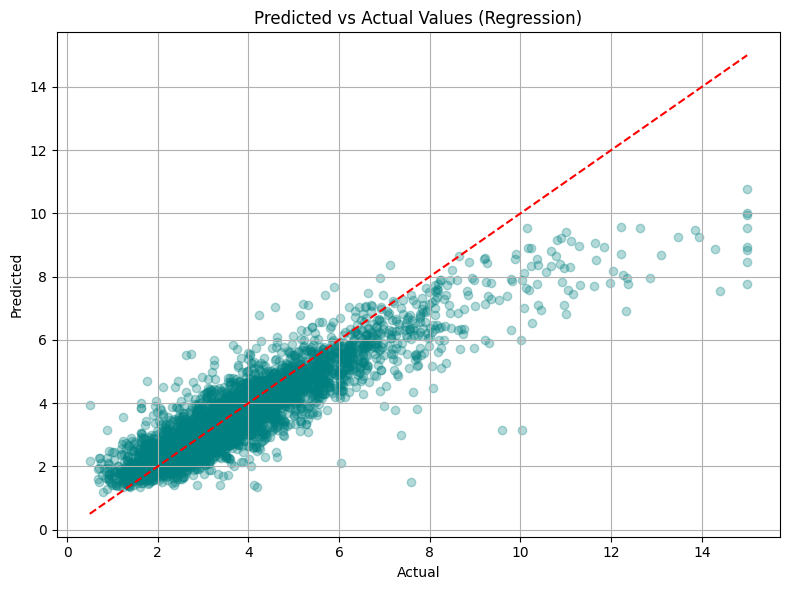

In [ ]:
# Visualisasi Regresi
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_reg, alpha=0.3, color='teal')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values (Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

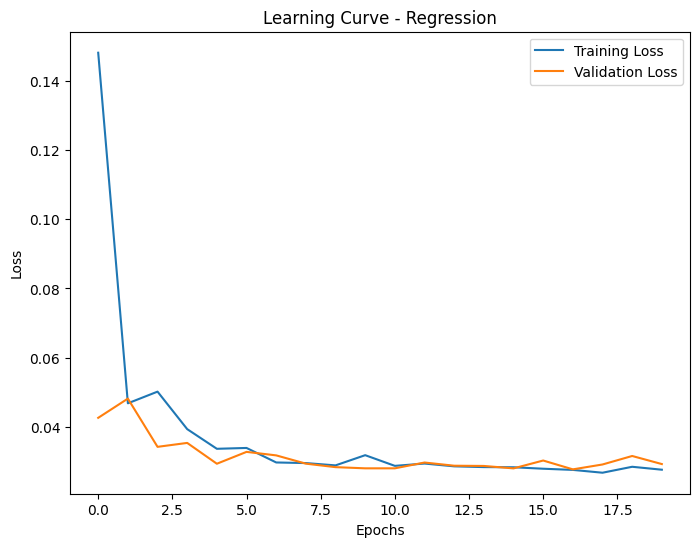

In [ ]:
# Visualisasi learning curve regresi
plt.figure(figsize=(8, 6))
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Regression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **DEFINISI DAN TRAINING MODEL KLASIFIKASI**
Membangun model neural network untuk klasifikasi dengan output sigmoid.

In [ ]:
# Classification model
def create_classification_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

clf_model = create_classification_model(X_train_class_processed.shape[1])
history_clf = clf_model.fit(
    X_train_class_processed, y_train_class,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7910 - loss: 0.4516 - val_accuracy: 0.8668 - val_loss: 0.3138
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8515 - loss: 0.3282 - val_accuracy: 0.8722 - val_loss: 0.3041
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8559 - loss: 0.3197 - val_accuracy: 0.8692 - val_loss: 0.3033
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8601 - loss: 0.3150 - val_accuracy: 0.8662 - val_loss: 0.3030
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8603 - loss: 0.3105 - val_accuracy: 0.8656 - val_loss: 0.3023
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8624 - loss: 0.3087 - val_accuracy: 0.8680 - val_loss: 0.3005
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8632 - loss: 0.3060 - val_accuracy: 0.8668 - val_loss: 0.2998
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8650 - loss: 0.3055 - val_accuracy: 0.

## **EVALUASI KLASIFIKASI**

In [ ]:
# Classification evaluation
y_pred_class_prob = clf_model.predict(X_test_class_processed)
y_pred_class = (y_pred_class_prob > 0.5).astype(int)
acc = accuracy_score(y_test_class, y_pred_class)
prec = precision_score(y_test_class, y_pred_class)
rec = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
roc_auc = roc_auc_score(y_test_class, y_pred_class_prob)

print("\nEvaluasi Klasifikasi:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluasi Klasifikasi:
Accuracy: 0.8639
Precision: 0.8810
Recall: 0.8348
F1 Score: 0.8573
AUC-ROC: 0.9454


## **VISUALISASI KLASIFIKASI: CONFUSION MATRIX**

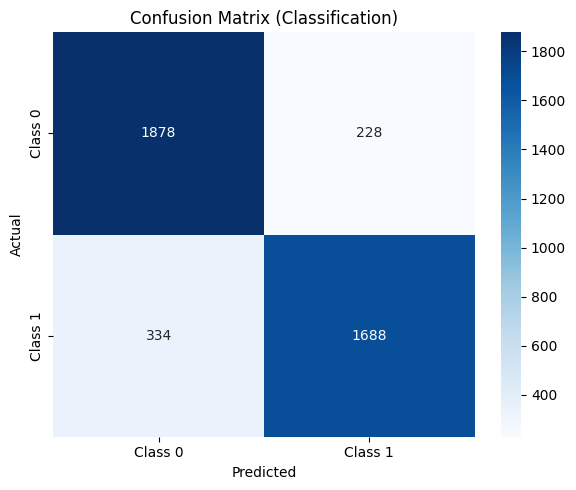

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2106
           1       0.88      0.83      0.86      2022

    accuracy                           0.86      4128
   macro avg       0.87      0.86      0.86      4128
weighted avg       0.86      0.86      0.86      4128



In [ ]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Classification)')
plt.tight_layout()
plt.show()

# Menampilkan classification report
print(classification_report(y_test_class, y_pred_class))

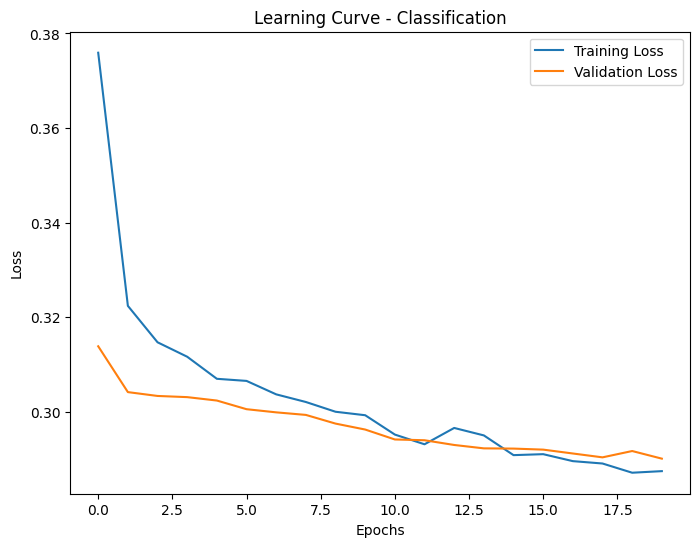

In [ ]:
# Visualisasi learning curve klasifikasi
plt.figure(figsize=(8, 6))
plt.plot(history_clf.history['loss'], label='Training Loss')
plt.plot(history_clf.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Classification')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Metrik Terbaik**

| Tipe Model    | Metrik Utama         | Alasan                                                                 |
|---------------|----------------------|------------------------------------------------------------------------|
| **Regresi**   | `R² Score`           | Menunjukkan seberapa baik model menjelaskan variansi target            |
|               | `RMSE`               | Memberikan gambaran intuitif terhadap skala kesalahan prediksi         |
| **Klasifikasi**| `F1 Score`           | Seimbang antara precision dan recall                                   |
|               | `AUC-ROC`            | Mengukur kemampuan model membedakan kelas positif dan negatif secara umum |



---

## 🔍 **Analisis Hasil Evaluasi**

### ✅ **Regresi**
- **MSE (Mean Squared Error):** `0.7801`
- **RMSE (Root Mean Squared Error):** `0.8832`
- **R² Score:** `0.7796`

📌 **Interpretasi:**
- R² Score mendekati 0.78 menunjukkan model mampu menjelaskan sekitar 78% variansi data target. Ini menandakan model cukup baik dalam memprediksi.
- Nilai RMSE sebesar 0.88 mengindikasikan rata-rata kesalahan prediksi sekitar 0.88 satuan dari nilai asli.
- MSE menunjukkan seberapa besar error total, tapi karena berbentuk kuadrat, lebih sensitif terhadap outlier.

💡 **Metrik terbaik untuk regresi:**
> R² Score paling mudah dipahami secara praktis dan ideal untuk mengevaluasi seberapa baik model menjelaskan variansi target.  
> Sedangkan RMSE lebih intuitif untuk memahami skala kesalahan absolut.


---

### ✅ **Klasifikasi**
- **Accuracy:** `86.39%`
- **Precision:** `88.10%`
- **Recall:** `83.48%`
- **F1 Score:** `85.73%`
- **AUC-ROC:** `0.9454`

📌 **Interpretasi:**
- Akurasi tinggi (86.39%) mengindikasikan bahwa sebagian besar prediksi benar.
- Precision tinggi (88.10%) berarti model jarang memberi false positive.
- Recall cukup tinggi (83.48%) berarti model cukup baik mendeteksi semua kasus positif.
- F1 Score (85.73%) adalah harmoni antara precision dan recall.
- AUC-ROC sebesar 0.9454 menunjukkan kemampuan model dalam membedakan kelas positif dan negatif sangat tinggi.

💡 **Metrik terbaik untuk klasifikasi:**
> Jika data seimbang, maka Accuracy dan F1 Score bisa diandalkan.  
> Tapi kalau ada potensi ketidakseimbangan kelas, AUC-ROC dan F1 Score lebih stabil.

🟩 **Kesimpulan:**
Model klasifikasi sangat kuat. Nilai AUC-ROC yang mendekati 1 menunjukkan model mampu membedakan kelas dengan sangat baik. F1 Score juga tinggi, yang berarti performa model seimbang antara presisi dan sensitivitas.

---



# **Jawaban Soal Analisa**

---

### **1. Jika menggunakan model MLP dengan 3 hidden layer (256-128-64) menghasilkan underfitting pada dataset ini, modifikasi apa yang akan dilakukan pada arsitektur? Jelaskan alasan setiap perubahan dengan mempertimbangkan bias-variance tradeoff!**

Jika model mengalami underfitting, artinya model memiliki bias tinggi dan variance rendah — belum cukup kompleks untuk menangkap pola dari data.

**Modifikasi yang bisa dilakukan:**

- Tambah jumlah neuron di hidden layer  
  Misalnya ubah arsitektur jadi `512-256-128`.  
  > Alasan: Dengan lebih banyak neuron, model punya kapasitas lebih tinggi untuk mempelajari fitur kompleks.

- Tambah jumlah hidden layer (deepening)  
  Misalnya jadi `512-256-128-64`.  
  > Alasan: Layer tambahan membantu menangkap pola hierarkis dan non-linearitas yang lebih dalam, menurunkan bias.

- Kurangi dropout rate atau hilangkan sementara  
  > Alasan: Dropout adalah regularisasi untuk mencegah overfitting. Saat underfitting, dropout justru bisa membatasi model belajar.

- Ubah fungsi aktivasi jika perlu
  Misalnya coba `LeakyReLU` atau `ELU` jika `ReLU` terlalu sering mengalami “dead neurons”.

> Bias-Variance Tradeoff:  
> - Tujuannya adalah menurunkan bias (underfitting) tanpa menaikkan variance secara ekstrem.  
> - Jadi, sambil menaikkan kompleksitas, perlu monitoring pada data validasi untuk mencegah overfitting.

---

### **2. Selain MSE, loss function apa yang mungkin cocok untuk dataset ini? Bandingkan kelebihan dan kekurangannya, serta situasi spesifik di mana alternatif tersebut lebih unggul daripada MSE!**

#### Alternatif Loss Function:
- **MAE (Mean Absolute Error)**  
  - **Kelebihan:** Tidak terlalu sensitif terhadap outlier. Cocok jika kita ingin error rata-rata yang lebih adil.  
  - **Kekurangan:** Tidak differentiable di titik nol → gradient bisa jadi lambat berubah, konvergensi bisa lebih lambat.
  - **Situasi cocok:** Data memiliki banyak outlier atau noise.

- **Huber Loss**  
  - Kombinasi antara MSE dan MAE, ada parameter `delta` sebagai ambang batas.  
  - **Kelebihan:** Lebih stabil dibanding MSE saat ada outlier, tapi tetap smooth seperti MSE.
  - **Kekurangan:** Harus atur parameter `delta` secara manual.
  - **Situasi cocok:** Saat ada sebagian outlier tapi tidak sebanyak untuk sepenuhnya pakai MAE.

> **Kesimpulan:**
- **MSE** bagus untuk menghukum outlier besar (karena kuadrat).
- **MAE** cocok kalau tidak ingin outlier mendominasi loss.
- **Huber** cocok untuk kompromi antara keduanya.

---

### **3. Jika salah satu fitur memiliki range nilai 0–1, sedangkan fitur lain 100–1000, bagaimana ini memengaruhi pelatihan MLP? Jelaskan mekanisme matematis (e.g., gradien, weight update) yang terdampak!**

Tanpa normalisasi, fitur dengan skala besar akan memiliki:

- Kontribusi dominan terhadap output lapisan berikutnya.
- Gradien yang lebih besar (pada backward pass), sehingga:
  - Update weight lebih besar untuk neuron terkait fitur tersebut.
  - Dapat menyebabkan konvergensi tidak stabil atau pelatihan lebih lambat.

📌 **Matematis:**
- Gradient descent update:  
  `w = w - α * ∇L`,  
  di mana `∇L` tergantung pada input. Input yang besar → gradien besar → update besar.

⚠️ Hal ini membuat pelatihan tidak adil untuk fitur yang bernilai kecil.

✅ **Solusi:**  
Gunakan **StandardScaler** atau **MinMaxScaler** untuk membuat semua fitur memiliki skala yang seragam (misalnya mean=0, std=1) agar proses training lebih stabil.

---

### **4. Tanpa mengetahui nama fitur, bagaimana Anda mengukur kontribusi relatif setiap fitur terhadap prediksi model? Jelaskan metode teknikal (e.g., permutation importance, weight analysis) dan keterbatasannya!**

#### 🔍 Metode:

1. **Permutation Feature Importance**
   - Acak nilai 1 fitur → lihat seberapa banyak akurasi/performa model turun.
   - **Kelebihan:** Agnostik terhadap model, bisa dipakai di model apapun.
   - **Kekurangan:** Mahal secara komputasi, dan jika fitur saling tergantung (multikolinearitas), hasil bisa bias.

2. **SHAP (SHapley Additive exPlanations)**
   - Menghitung kontribusi tiap fitur terhadap prediksi menggunakan teori game.
   - **Kelebihan:** Sangat akurat, bisa menjelaskan prediksi per data point.
   - **Kekurangan:** Komputasi berat, terutama untuk dataset besar.

3. **Weight Analysis (khusus MLP)**
   - Lihat bobot layer pertama → fitur dengan bobot besar dianggap penting.
   - **Kelebihan:** Cepat dan langsung.
   - **Kekurangan:** Tidak akurat saat ada normalisasi, aktivasi non-linear, atau arsitektur dalam.

---

### **5. Bagaimana Anda mendesain eksperimen untuk memilih learning rate dan batch size secara optimal? Sertakan analisis tradeoff antara komputasi dan stabilitas pelatihan!**

#### ✅ Desain Eksperimen:

1. **Gunakan Grid Search atau Random Search**
   - Misalnya:
     - Learning rate: `[1e-4, 1e-3, 1e-2]`
     - Batch size: `[16, 32, 64, 128]`

2. **Gunakan learning rate finder (LR range test)**
   - Mulai dari learning rate kecil → naikkan perlahan → plot loss.  
     Titik sebelum loss naik drastis = learning rate ideal.

3. **Evaluasi dengan Validation Loss dan Waktu Latih**
   - Simpan loss dan waktu tiap eksperimen.
   - Cari tradeoff antara akurasi, stabilitas, dan efisiensi waktu.

#### ⚖️ **Tradeoff:**

| Parameter       | Nilai Kecil                      | Nilai Besar                       |
|----------------|----------------------------------|-----------------------------------|
| **Learning Rate** | Stabil, tapi lambat konvergen   | Cepat, tapi bisa melompat minima  |
| **Batch Size**    | Lebih generalisasi, akurat     | Lebih cepat, tapi rentan overfit  |

> Biasanya:
> - `lr=0.001` dan `batch_size=32` adalah awal yang aman.
> - Gunakan **EarlyStopping** untuk menghentikan saat loss naik kembali.

---
